In [1]:
import numpy as np
import math
from Deterministic_MDP import Motion

In [2]:
initial_value=np.zeros([3,4])
initial_policy=[]
for i in range(len(initial_value)):
    initial_policy_row=[]
    for j in range(len(initial_value[i])):
        initial_policy_row.append([])
    initial_policy.append(initial_policy_row)

In [3]:
initial_policy

[[[], [], [], []], [[], [], [], []], [[], [], [], []]]

In [4]:
def step_optimization(start_row,start_column,value_map,discount,dp):
    
    udp=(1-dp)/3
    
    Step_motion=Motion(start_row,start_column,value_map,discount)
    upvalue,upnew=Step_motion.up_value()
    
    Step_motion=Motion(start_row,start_column,value_map,discount)
    downvalue,downnew=Step_motion.down_value()
    
    Step_motion=Motion(start_row,start_column,value_map,discount)
    leftvalue,leftnew=Step_motion.left_value()
    
    Step_motion=Motion(start_row,start_column,value_map,discount)
    rightvalue,rightnew=Step_motion.right_value()
    
    policy_value={'up':upvalue,'down':downvalue,'left':leftvalue,'right':rightvalue}
    policy_new_input={'up':upnew,'down':downnew,'left':leftnew,'right':rightnew}
    action_value={}
    
    
    for a in policy_value.keys():
        d_value=0
        for b in policy_value.keys():
            if b==a:
                d_value=d_value+dp*policy_value[b]
            else:
                d_value=d_value+udp*policy_value[b]
        action_value.update({a:d_value})
    
    opt_action=max(action_value)
    return action_value,policy_new_input

In [5]:
def value_map(start_row,start_column,initial_value,initial_policy,discount,dp,iteration):
    k=0
    while k<iteration:
        step_value,step_policy=step_optimization(start_row,start_column,initial_value,discount,dp)
        max_value=max(step_value.values())
        initial_value[start_row][start_column]=max_value
        opt_action={}
        for key in step_value.keys():
            if step_value.get(key)==max_value:
                start=step_policy.get(key)
                initial_policy[start_row][start_column]=key
                break
        start_row=start['row']
        start_column=start['column']
        k+=1
    value=initial_value
    policy=initial_policy
    return value,policy

In [6]:
Final_value,Final_policy=value_map(2,3,initial_value,initial_policy,0.9,0.75,1000000)

In [7]:
Final_value

array([[-1.73503066, -0.91151986, -0.96372396, -1.73854167],
       [-0.96936786, -0.69381007, -0.68516196, -0.95833333],
       [-2.35093222, -1.20345559, -0.96914491, -1.66666667]])

In [8]:
Final_policy

[['down', 'left', 'down', 'left'],
 ['down', 'right', 'left', 'up'],
 ['right', 'up', 'left', 'up']]

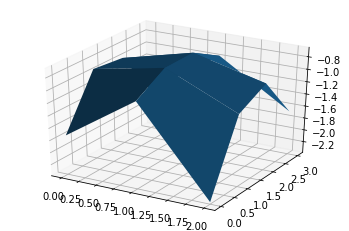

In [9]:
xx=np.arange(0,3,1)
yy=np.arange(0,4,1)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax=fig.gca(projection='3d')
my,mx=np.meshgrid(yy,xx)
ax.plot_surface(mx,my,Final_value)